# Correlations Between Brand Mentions and Events, Athlete Performances, or Product Launches

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

articles = pd.read_csv('../data/cleaned_articles.csv')
combined_sentiments = pd.read_csv('../data/combined_sentiments.csv')
combined_sentiments['publish_date'] = pd.to_datetime(combined_sentiments['publish_date'])

In [12]:
combined_sentiments.isna().sum()

Unnamed: 0       0
publish_date     0
polarity        36
subjectivity    36
content          0
brand            0
dtype: int64

In [13]:
# impute means
combined_sentiments['polarity'] = combined_sentiments.groupby('brand')['polarity'].transform(lambda x: x.fillna(x.mean()))
combined_sentiments['subjectivity'] = combined_sentiments.groupby('brand')['subjectivity'].transform(lambda x: x.fillna(x.mean()))

In [14]:
combined_sentiments.isna().sum()

Unnamed: 0      0
publish_date    0
polarity        0
subjectivity    0
content         0
brand           0
dtype: int64

In [15]:
monthly_article_counts = combined_sentiments.groupby([combined_sentiments['publish_date'].dt.to_period('M'), 'brand']).size().reset_index(name='article_count')
monthly_article_counts['publish_date'] = monthly_article_counts['publish_date'].dt.to_timestamp()

In [16]:
# Group by month and brand to count the number of articles
monthly_article_counts = combined_sentiments.groupby([combined_sentiments['publish_date'].dt.to_period('M'), 'brand']).size().reset_index(name='article_count')

# Convert 'publish_date' back to datetime for plotting
monthly_article_counts['publish_date'] = monthly_article_counts['publish_date'].dt.to_timestamp()


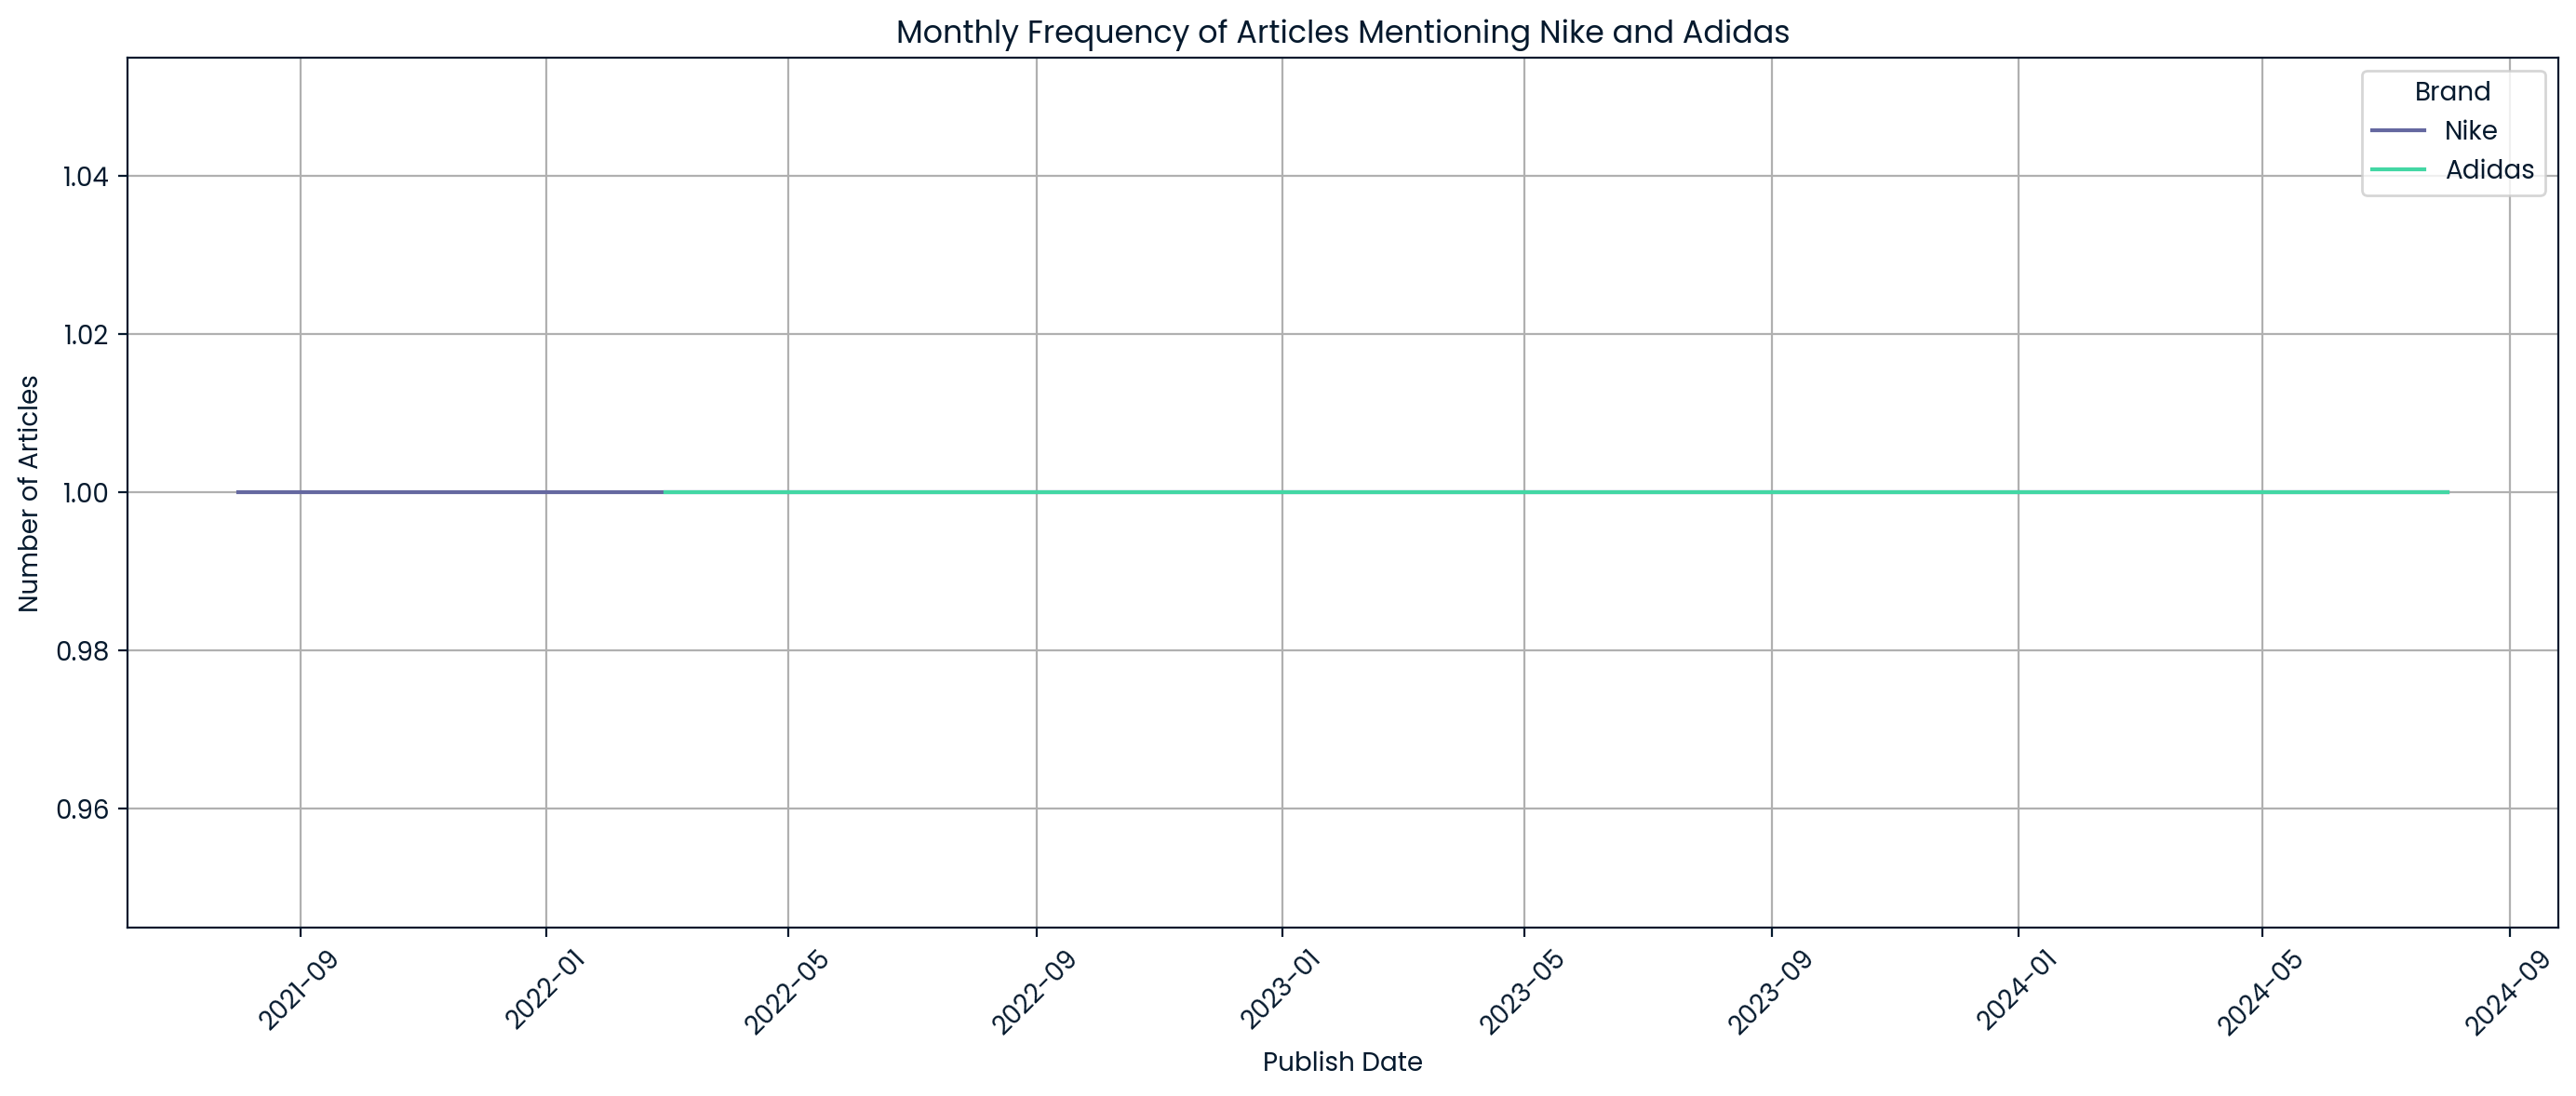

In [17]:
# Plot the frequency of mentions over time
plt.figure(figsize=(14, 6))

# Line plot for Nike
sns.lineplot(data=monthly_article_counts[monthly_article_counts['brand'] == 'Nike'], x='publish_date', y='article_count', label='Nike')

# Line plot for Adidas
sns.lineplot(data=monthly_article_counts[monthly_article_counts['brand'] == 'Adidas'], x='publish_date', y='article_count', label='Adidas')

# Formatting the plot
plt.title('Monthly Frequency of Articles Mentioning Nike and Adidas')
plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.legend(title='Brand')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
